## Intro & Questions to be answered 

In [ ]:
# These are the columns of the titanic_data file contains:

# Survived        Survival
#               (0 = No; 1 = Yes)
# Pclass          Passenger Class
#               (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name            Name
# Sex             Sex
# Age             Age (in years)
# SibSp           Number of Siblings/Spouses Aboard
# Parch           Number of Parents/Children Aboard
# Ticket          Ticket Number
# Fare            Passenger Fare
# Cabin           Cabin
# Embarked        Port of Embarkation
#               (C = Cherbourg; Q = Queenstown; S = Southampton)
# PassenderId    Passender ID

# There are several questions about the Titanic data that I have:

# 1. Who was the oldest survivor and what does the distribution of passengers' ages look like?
# 2. Was there a relationship between age and survival rate?
# 3. Did having a cabin increase survival rate?
# 4. Did gender play a factor in terms of revenue and fare price?

## Import the library that will be used for this analysis and the csv file for analysis

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodecsv

%matplotlib inline


filename = 'titanic_data.csv'
titanic_data = pd.read_csv(filename)

## original titanic survival data

In [126]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Wrangling

Under Age and Cabin categories, empty values are presented. For accuracy purposes, I will remove any entries which has an empty Age value as I am not able to determine if empty values represent infants or any other age group. 

In [127]:
titanic_data = titanic_data.dropna(subset=['Age'])

Moreover, since there are many null value in the 'Cabin' column, I have to assume that those values were not collected efficiently due to poor data collection process, and I will assign them as 'Unavailable'.

In [128]:
titanic_data['Cabin'][(titanic_data['Cabin'].isnull())]='Unavailable'
titanic_data.head(5)

/Users/tonychu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unavailable,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unavailable,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unavailable,S


In [129]:
pos = titanic_data['Fare'].argmax()

titanic_data.loc[pos]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin               Unavailable
Embarked                      C
Name: 258, dtype: object

count    714.00
mean      34.69
std       52.92
min        0.00
25%        8.05
50%       15.74
75%       33.38
max      512.33
Name: Fare, dtype: float64


(-20, 100)

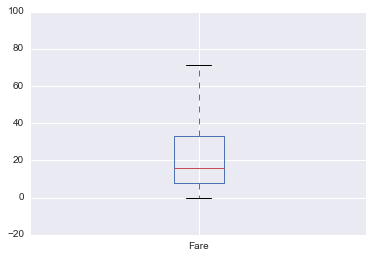

In [130]:
print titanic_data['Fare'].describe().round(2)
x = titanic_data['Fare'].plot(kind='box')
x.set_ylim(-20,100)

## 1. Who was the oldest survivor?

This part finds the oldest survivor, and returns his or her relevant information. First I will drop all the passengers who did not survive, then find the index of the person who is the oldest. Lastly I will Retract the name and age of the survivor using the index

In [182]:
def oldest_person(data):
    data = data.drop(data['Survived']==0)
    
    position = data['Age'].argmax()
    
    person = data['Name'].loc[position]
    age = data['Age'].loc[position]
   
    print '{} was the oldest survivor, who was {} years old '.format(person,age)
    print '\nAdditional Info: \n'
    print data.loc[position]
    
oldest_person(titanic_data)

Barkworth, Mr. Algernon Henry Wilson was the oldest survivor, who was 80.0 years old 

Additional Info: 

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object


## 1.2  what does the distribution of passengers' ages look like?

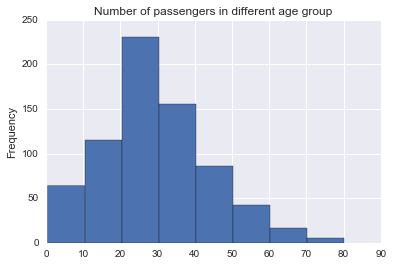

In [132]:
titanic_data['Age'].set_xlabel='Age'
titanic_data['Age'].plot(kind='hist',bins = 8, title='Number of passengers in different age group')

count    714.0
mean      29.7
std       14.5
min        0.4
25%       20.1
50%       28.0
75%       38.0
max       80.0
Name: Age, dtype: float64
Axes(0.125,0.125;0.775x0.775)


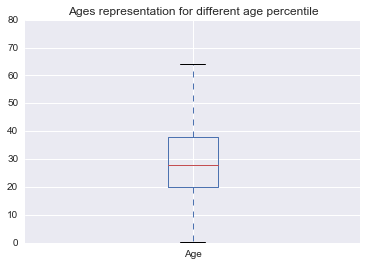

In [133]:
print titanic_data['Age'].describe().round(1)
print titanic_data['Age'].plot(kind='box',title='Ages representation for different age percentile')

As we can see, among 714 entries of titanic passengers, the average age was 29.7. The youngest passenger was about 5 months old, the median age is 28, and the oldest passenger was 80 years old. The bottom boxplot chart gives a representation of different ages of passengers at different quartiles. 25% of the passengers were younger than 20.1 years old, 50% of the passengers were younger than 28 years old, and 25% of the passengers were older than 38 years old. This box plot exclude any outliers, who were more than 65 years old.

## 2. Was there a relationship between age and survival rate?

       Survivors
Age             
0-10          38
11-20         44
21-30         84
31-40         69
41-50         33
51-60         17
61-70          4
71-80          1
       Survival Rate
Age                 
0-10        0.053221
11-20       0.061625
21-30       0.117647
31-40       0.096639
41-50       0.046218
51-60       0.023810
61-70       0.005602
71-80       0.001401


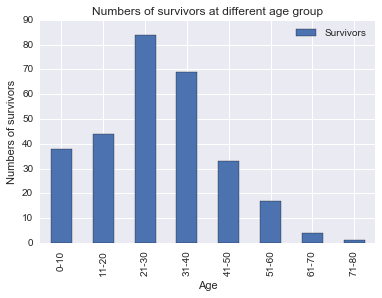

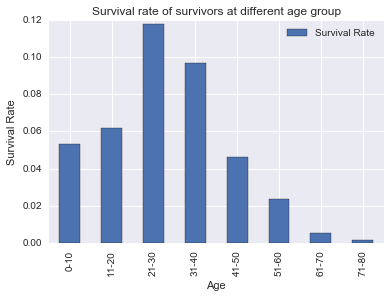

In [134]:
# This section's purpose is to explore the survival rate of each age group

age = titanic_data['Age']

zeroten = ((age <= 10) & (age >=0) & (titanic_data['Survived']==1)).sum()
tentwenty = ((age<=20) & (age > 10) & (titanic_data['Survived']==1)).sum()
twentythirty = ((age<=30) & (age > 20) & (titanic_data['Survived']==1)).sum()
thirtyfourty = ((age<=40) & (age > 30) & (titanic_data['Survived']==1)).sum()
fourtyfifty = ((age<=50) & (age > 40) & (titanic_data['Survived']==1)).sum()
fiftysixty = ((age<=60) & (age > 50) & (titanic_data['Survived']==1)).sum()
sixtyseventy = ((age<=70) & (age > 60) & (titanic_data['Survived']==1)).sum()
seventyeighty = ((age<=80) & (age > 70) & (titanic_data['Survived']==1)).sum()

chart = pd.DataFrame({
        
        'Survivors':[zeroten,tentwenty,twentythirty,thirtyfourty,fourtyfifty,fiftysixty,sixtyseventy,seventyeighty],
        'Age':['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
    })

print chart.set_index('Age')

rate = chart['Survivors']/age.count()
survival_rate = pd.DataFrame({
        'Survival Rate':rate,
        'Age':['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
    })
print survival_rate.set_index('Age')

chart = chart.set_index('Age')
chart = chart.plot(kind='bar',title = 'Numbers of survivors at different age group')
chart = chart.set_ylabel("Numbers of survivors")

survival_rate = survival_rate.set_index('Age')
survival_rate = survival_rate.plot(kind='bar',title = 'Survival rate of survivors at different age group')
survival_rate = survival_rate.set_ylabel("Survival Rate")

chart
survival_rate

Passengers in between age 21 and 30 survived the most as the group had a 11.76% chance of surviving

## 3. Did passengers with recorded cabin services have a higher chance of survival?

In [135]:
# This part of the report explores the survival rate between passengers with recorded 
# cabin service and passengers whose cabin status were not recorded
# Several calculations with respect to numbers of survivors and cabin status are 
# followed by chi-square test to discover the relationship between two factors

# 3.1 The number of people who survived and who did not

num_of_survived_passengers = titanic_data['Survived'].sum()
total_num_of_passengers = titanic_data['PassengerId'].count()
num_of_passengers_who_didnt_survive = total_num_of_passengers - num_of_survived_passengers
print "There are {} survivors.".format(num_of_survived_passengers)
print "{} passengers did not survive.".format(num_of_passengers_who_didnt_survive)

There are 290 survivors.
424 passengers did not survive.


## 3.2 The number of passengers whose cabin location were recorded and whose weren't

In [136]:
num_of_passengers_without_cabin = (titanic_data['Cabin'] == 'Unavailable').sum(axis=0)
num_of_passengers_with_cabin = titanic_data['Cabin'].count() - num_of_passengers_without_cabin

print 'There are {} of passengers cabin locations were recorded '.format(num_of_passengers_with_cabin)
print 'There are {} of passengers cabin locations were not recorded'.format(num_of_passengers_without_cabin)


There are 185 of passengers cabin locations were recorded 
There are 529 of passengers cabin locations were not recorded


## 3.3 Passenger status

In [137]:
num_of_survivors_with_cabin = ((titanic_data['Cabin']!='Unavailable') & (titanic_data['Survived']==1)).sum()
num_of_non_survivors_with_cabin = ((titanic_data['Cabin']!='Unavailable') & (titanic_data['Survived']==0)).sum()
num_of_survivors_without_cabin = ((titanic_data['Cabin']=='Unavailable') & (titanic_data['Survived']==1)).sum()
num_of_non_survivors_without_cabin = ((titanic_data['Cabin']=='Unavailable') & (titanic_data['Survived']==0)).sum()
#print '{} of people had cabins and survived.'.format(num_of_survivors_with_cabin)
#print '{} of people had cabins and did not survive.'.format(num_of_non_survivors_with_cabin)
#print '{} of people had no cabins and survived.'.format(num_of_survivors_without_cabin)
#print '{} of people had no cabins and did not survive.'.format(num_of_non_survivors_without_cabin)

   Did not survive  Survived         index
0               60       125      Recorded
1              364       165  Not Recorded


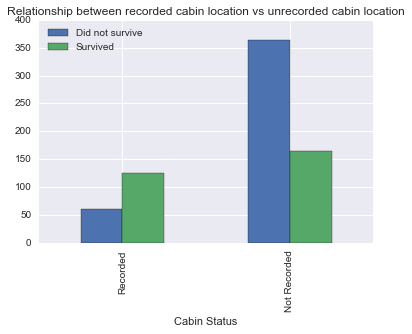

In [138]:
# This section provides visualization of number of passengers in different circumstances

cabin_survival_data = pd.DataFrame({
        'index': ['Recorded','Not Recorded'],
        'Survived':[num_of_survivors_with_cabin,num_of_survivors_without_cabin],
        'Did not survive':[num_of_non_survivors_with_cabin, num_of_non_survivors_without_cabin] 
    })


print cabin_survival_data
cabin_survival_chart= cabin_survival_data.set_index('index')
cabin_survival_chart=cabin_survival_chart.plot(kind='bar', title='Relationship between recorded cabin location vs unrecorded cabin location')
cabin_survival_chart.set_xlabel('Cabin Status')
# To further explore, I will compare the survival rate with different cabin status

In [139]:
# This functions takes in several survival data and returns a bar chart that compares two cabin status
def calculate_survival_rate(survivors_with_cabin, passengers_with_cabin,survivors_without_cabin,passengers_without_cabin):
    cabin_survival_rate = float(survivors_with_cabin)/passengers_with_cabin
    no_cabin_survival_rate = float(survivors_without_cabin)/passengers_without_cabin
    
    print '{}% of passengers with recorded cabin location survived'.format(round(cabin_survival_rate*100,2))
    print '{}% of passengers without recorded cabin location survived'.format(round(no_cabin_survival_rate*100,2))
    
    survival_comparison = pd.DataFrame({
        'index':['Recorded','Not Recorded'],
        'survival_rate':[cabin_survival_rate,no_cabin_survival_rate]
    })
    return survival_comparison

In [140]:
# This function makes sure the chart is properly labeled
def edit_chart(comparison):
    comparison.set_xlabel('Cabin Status')
    comparison.set_ylabel('Survival Rate')
    comparison.set_ylim(0)

67.57% of passengers with recorded cabin location survived
31.19% of passengers without recorded cabin location survived


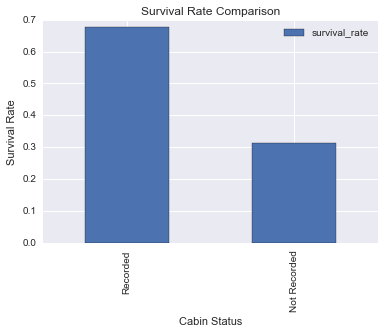

In [141]:
observed_survival_comparison = calculate_survival_rate(num_of_survivors_with_cabin, num_of_passengers_with_cabin,num_of_survivors_without_cabin,num_of_passengers_without_cabin)

observed_survival_comparison=observed_survival_comparison.set_index('index')
observed_survival_comparison=observed_survival_comparison.plot(kind='bar',title='Survival Rate Comparison')

edit_chart(observed_survival_comparison)

As we can see from the chart, 67.57% of passengers with cabin location recorded survived, while only 31.19% of passengers witout cabin location recorded survived. As a result, cabin status seems to have an impact on survival rate. To further validate my theory, I will conduct a chi-squar test

### My null hypothesis(H0) would be that the cabin's recording status and survival rate are independent
### My alternative hypothesis(Ha) would be that the cabin's recording statusand survival rate are not independent. 

degrees of freedom = 1.
By using the chi-square table (link: https://people.richland.edu/james/lecture/m170/tbl-chi.html),
I found the critical chi-square value at alpha = 0.05 is 3.841

In [142]:
# Here are the expected number of passengers in different circumstances
expected_num_of_survivors_with_cabin = (float(num_of_survived_passengers)/total_num_of_passengers)*num_of_passengers_with_cabin
expected_num_of_non_survivors_with_cabin = (float(num_of_passengers_who_didnt_survive)/total_num_of_passengers)*num_of_passengers_with_cabin
expected_num_of_survivors_without_cabin = (float(num_of_survived_passengers)/total_num_of_passengers)*num_of_passengers_without_cabin
expected_num_of_non_survivors_without_cabin = (float(num_of_passengers_who_didnt_survive)/total_num_of_passengers)*num_of_passengers_without_cabin
#print '{} of people who had cabins expected to survive.'.format(round(expected_num_of_survivors_with_cabin,2))
#print '{} of people who had cabins expected to not survive.'.format(round(expected_num_of_non_survivors_with_cabin,2))
#print '{} of people who had no cabins expected to survive.'.format(round(expected_num_of_survivors_without_cabin,2))
#print '{} of people who had no cabins expected to not survive.'.format(round(expected_num_of_non_survivors_without_cabin,2))

#### This section provides visualization of expected number of passengers in different circumstances

   Did not survive    Survived         index
0       109.859944   75.140056      Recorded
1       314.140056  214.859944  Not Recorded


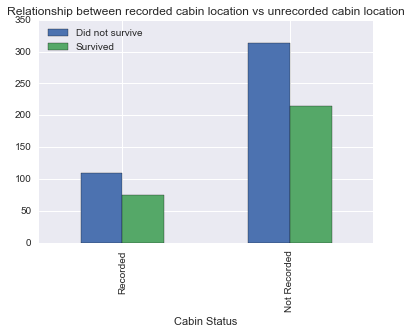

In [143]:
expected_cabin_survival_data = pd.DataFrame({
        'index': ['Recorded','Not Recorded'],
        'Survived':[expected_num_of_survivors_with_cabin,expected_num_of_survivors_without_cabin],
        'Did not survive':[expected_num_of_non_survivors_with_cabin,expected_num_of_non_survivors_without_cabin]
    })

print expected_cabin_survival_data
expected_cabin_survival_chart= expected_cabin_survival_data.set_index('index')
expected_cabin_survival_chart=expected_cabin_survival_chart.plot(kind='bar', title='Relationship between recorded cabin location vs unrecorded cabin location')
expected_cabin_survival_chart.set_xlabel('Cabin Status')

40.62% of passengers with recorded cabin location survived
40.62% of passengers without recorded cabin location survived


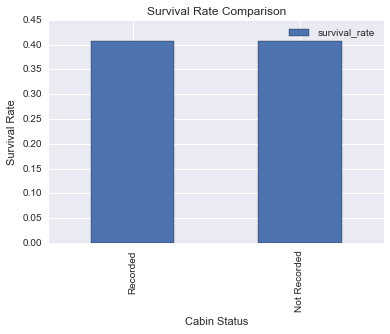

In [144]:
expected_survival_comparison = calculate_survival_rate(expected_num_of_survivors_with_cabin, num_of_passengers_with_cabin,expected_num_of_survivors_without_cabin,num_of_passengers_without_cabin)

expected_survival_comparison=expected_survival_comparison.set_index('index')
expected_survival_comparison=expected_survival_comparison.plot(kind='bar',title='Survival Rate Comparison')

edit_chart(expected_survival_comparison)

# I was expected the same percentage (40.62%) of passengers with or without recorded cabin location to survive

In [145]:
diff = (cabin_survival_data.drop('index',1)-expected_cabin_survival_data.drop('index',1))
chi_statistics = (pow(diff,2)/expected_cabin_survival_data)
print 'The chi statistics is {}.'.format(chi_statistics.sum().sum())

The chi statistics is 75.1981147532.


since chi-statistics is 75.2 and chi-square value at alpha = 0.05 is only 3.841, we reject the null hypothesis that the cabin's recording status and survival rate are independent. There is an evidence that passengers' chances of survival were related to cabin's recording stutas, so to answer my own question, by having a cabin location recorded seemed to increase increase the survival rate

## 4. Did gender play a factor in terms of revenue/fare price and survival?

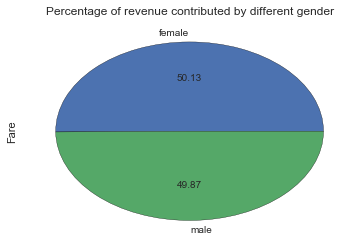

In [177]:
revenue_by_sex=titanic_data.groupby('Sex')['Fare'].sum()
revenue_by_sex.plot(kind='pie',autopct='%.2f',title='Percentage of revenue contributed by different gender')

As we see from the pie chart, male and female contributed almost identical amount of revenue at 50.13% and 49.87% respectively

In [178]:
titanic_data.groupby('Sex')['PassengerId'].count()

Sex
female    261
male      453
Name: PassengerId, dtype: int64

However, it showed that there were 192 more male passengers than female passengers. This made me question whether female spent more money on the boat fare than male.

In [179]:
titanic_data.groupby('Sex')['Fare'].mean()

Sex
female    47.582759
male      27.268836
Name: Fare, dtype: float64

As we have predicted, female spent on average $20.32 more than male. This leads me to question the survival rate of two genders.

In [176]:
male_survival= float(((titanic_data['Sex']=='male')&(titanic_data['Survived']==1)).sum())/(titanic_data['Sex']=='male').sum()
female_survival= float(((titanic_data['Sex']=='female')&(titanic_data['Survived']==1)).sum())/(titanic_data['Sex']=='female').sum()
print '{}% of the male passengers survived'.format(round(male_survival*100,3))
print '{}% of the female passengers survived'.format(round(female_survival*100,3))

20.53% of the male passengers survived
75.479% of the female passengers survived


# Conclusion


Revisit the questions that I had in the beginning:
1. Who is the oldest survivor and what does the distribution of passengers' age look like?

    Mr. Barkworth Algernon Henry Wilson was the oldest survivor at 80 years old. On top of it, the passengers had an average age of 29.7. The youngest passenger was about 5 months old, the median age is 28, and the oldest passenger was 80 years old. 

Limitations: 
         There are several entries where the age, cabin, and embarked columns have null value. 
     As for the age column, since I was not able to determine passengers' age, I beileve it was still safe to            remove those entries because we'd still have a big enough sample to work with.

2. Was there a relationship between age and survival rate?

    As we can see from the result, seems like people in between age 21 and 30 survived the most as the group had a 11.76% chance of surviving. As for the rest of the age group, other than the passengers that were under 20 years old who I assume were underage and were accompanied with family members, the older the passengers, the lower the survival rate. In other words, age and survival rate seemed to be negatively correlated.
    
Limitations:
         Even though there were 714 entries that recorded passengers' age, nearly 300 of the entries were removed 
     due to the fact that their ages weren't present in the data set. I would never know whether those entries would      change the outcome of the dataset; as a result, I had to approach the survival rate from different angles.   

3. Did passengers with recorded cabin locations have a higher chance of survival?

    67.57% of passengers with cabin location recorded survived, while only 31.19% of passengers with no cabin location recorded survived. As a result, cabin status seems to have an impact on survival rate. The chi-square test validates my hypothesis as the chi-statistics was 75.2 while the chi-squared value at alpha = 0.05 is only 3.841.

Limitation: 
         For the empty cell in cabin column, I assume they were empty due to poor data collection process or the data      was lost. As a result, I replaced all the empty cells with "Unavailbale" to represent cabin status that were          not recorded in the beginning. 
         Chi-square test was chosen because the survival column was non-numerical, and the test was able to quantify        and test whether survial and cabin status are are dependent or not.

4. Did gender play a factor in terms of revenue/fare price and survival?

    Gender definitely played a role in terms of revenue and the survival rate. As we can see from the analysis, male and female contributed almost an identical amount of money to the total revenue. However, as I discovered, there were less female passengers than male passengers, and female on average had spent $20.32 more than male. This phenomenon made me wonder if fare price spent by different gender made an impact on survival rate as well. 
    I found out only 20.53% of the male passengers survived, while a shockingly 75.479% of the female passengers survived. This result might be due to several reasons:
        1. The higher fare spent allowed female passengers to have faster or easier access to lifeboat or                        emergency services.
        2. The lifeboat or emergency services simply allowed female and childrens to get onboard first.
    
Limitation:
    Since we were not able to gather information completely on cabin location for each passenger, even though higher fare seemed to indicate better cabin locations and access to emergency service, we were not able to conclude better/more expensive cabin gave passengers a higher chance of survival. However gender factor seemed to suggest so as female passengers paid more and had a higher survival rate. 